# **Hotel Booking Cancellation Prediction**

--------------------------------
## **Context** 
-------------------------------

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include changes of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings potentially impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices at last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

----------------------------
## **Objective**
----------------------------- 

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting **which booking is likely to be canceled**. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a data scientist, have to analyze the data provided to find which **factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.**


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: The unique identifier of each booking

* no_of_adults: The number of adults

* no_of_children: The number of children

* no_of_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay at the hotel

* no_of_week_nights: The number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

* type_of_meal_plan: The type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)

* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

* room_type_reserved: The type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

* lead_time: The number of days between the date of booking and the arrival date

* arrival_year: The year of arrival date

* arrival_month: The month of arrival date

* arrival_date: The date of the month

* market_segment_type: Market segment designation.

* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

* no_of_previous_cancellations: The number of previous bookings that were canceled by the customer before the current booking

* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the customer before the current booking

* avg_price_per_room: The average price per day for the reservation; prices of the rooms are dynamic. (in euros)

* no_of_special_requests: The total number of special requests made by the customer (e.g. high floor, view from the room, etc.)

* booking_status: Flag indicating if the booking was canceled or not. The class 0 represents the Not_Canceled whereas class 1 represents the Canceled label.

## **Importing the necessary libraries and overview of the dataset**

In [50]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Algorithms to use
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import STATUS_OK
from hyperopt import Trials
from hyperopt import fmin
from hyperopt import hp
from hyperopt import tpe

# Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### **Loading the data**

In [2]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# Let's copy data to another variable to avoid any changes to original data
data = hotel.copy()
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset has **36,275 rows and 19 columns**. 

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while the rest of the columns are numeric in nature.

* There are **missing values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [5]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

In [6]:
data.drop('Booking_ID', axis=1, inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics for numerical columns**

In [7]:
# Let's select numerical columns and check the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:**

- Average number of Adult staying in a room is 1.84. The odd thing is that minimal number of adults is 0. Probably in these cases the room is booked only for children. 
- Average number of children is 0.1 and we see that up to 75% quartile  there is no children at all. So we can conclude people quite rarely stay with children when choosing INN Hotels Group.
- We can see that median number of weekend nights is 1 and median number of week nights is 2. So people mostly use hotels of INN Hotel Group for a short stay and this also explains why people rarely stay with children. 
- Up to 75% qurtile included people don't need car parking space. It means that people rarely travel to a hotel by car and rarely use a rented car while staying. 
- Average Lead time is 86 days, with median of 57 days and maximum of 443 days (more than a year). There might be outliers in this column.
- Up to 75% of all guests are not repeated.
- At least 75% of all customers have no previous cancellations. 
- At least 75% of all bookings were not cancelled. 
- Average price per room is 103 Euro, highest price is 540 Euro. This looks plausible, but the odd thing is that minimal price was 0. Probably this means that sometimes rooms were provided for free or these are outliers. 
- At least 50% of customers have no special requests. The maximum number of special requests is 5.  

**Let's inspect the average room prices for 0 values**

In [8]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [9]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

**Observations:**

* It makes sense that most values with room prices equal to 0 are the rooms given as a complimentary service by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

### **Let's check the distribution and outliers for numerical columns in the data**

LEAD_TIME
Skew : 1.29


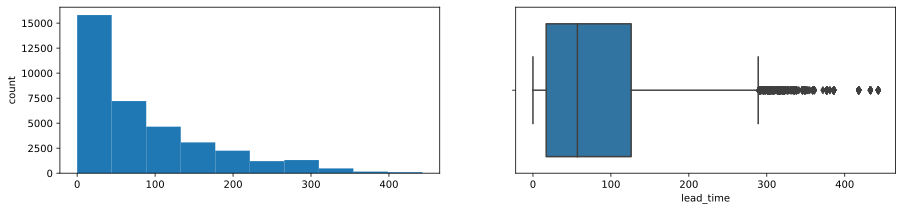

NO_OF_PREVIOUS_CANCELLATIONS
Skew : 25.2


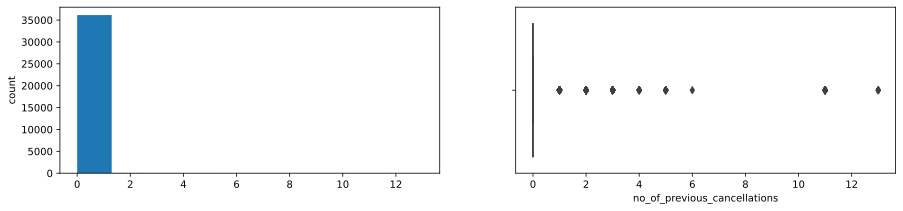

NO_OF_PREVIOUS_BOOKINGS_NOT_CANCELED
Skew : 19.25


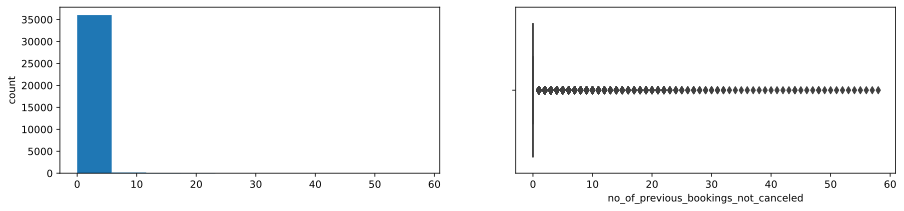

AVG_PRICE_PER_ROOM
Skew : 0.67


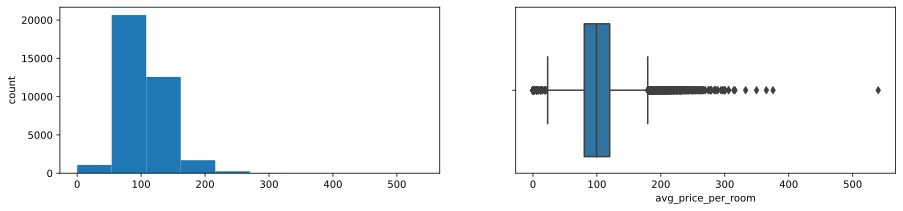

In [10]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col.upper())
    
    print('Skew :', round(data[col].skew(), 2))
       
    plt.figure(figsize = (15, 3))
    
    plt.subplot(1,2,1)
    data[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:**

- The lead time has right skewed distribution which is very logical. There seem to be outliers in the upper range. 
- There is almost no previous booking cancelation. In the upper range we seem to have outliers.
- The most of the customers stay for the first time, but there might be outliers in the upper range of number of previous bookings not cancelled. 
- The average room price is slightly right skewed. Which is logical, because only few rooms are luxirious and have high price. At the same time if there are only few observations above some threshold in price (ex. 210 as we can see it from distriburion) these are might be outliers. 

In [11]:
# Let's see how many observations have room price higher than 270 Euro.
data[data["avg_price_per_room"]>400].shape[0]

1

In [12]:
# Let's see what percentage is it
data[data["avg_price_per_room"]>400].shape[0]/data.shape[0]

2.7567195037904893e-05

**Observations:**

- We see that there is only one observation above 400
- We can cap it it the previous maximum value

In [13]:
avg_price_per_room_upper_bound=data[data["avg_price_per_room"] < 400]['avg_price_per_room'].max()
avg_price_per_room_upper_bound

375.5

In [14]:
# Assigning the value of upper whisker to outliers
data.loc[data["avg_price_per_room"] > 400, "avg_price_per_room"] = avg_price_per_room_upper_bound

**Now, let's check the percentage of each category for categorical variables.**

In [15]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space', 
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests', 
        'booking_status']

for col in cat_cols:
    print(data[col].value_counts(normalize=True))
    print('-'*100)

2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: no_of_adults, dtype: float64
----------------------------------------------------------------------------------------------------
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64
----------------------------------------------------------------------------------------------------
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: no_of_week_nights, dtype: float64
----------------------------------------------------------------------------------------------------
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: no_of_weekend_nights, dtype: float64


**Observations:**

- 72% of the bookings were made for 2 adults. ~ 0.4% of the bookings had no adults at all, probably adults made these bookings solely for children. 
- 92% of the bookings were made solely for adults. There are some cases where the bookings were made for 3, 9 and 10 children. But they account for less than 0.1% combined. Most likely these are outliers, so we can cap number of children at 3.
- Around 80% of all the bookings were made for 1 to 3 nights. Customers rarely stay in the hotels for long.
- Around 99% of all the bookings were made for up to 2 weekend nights.
- Around 97% of all customers didn't need a car parking space.
- Around 77% of the bookings were made with a meal plan 1.
- Around 78% of the customers chose room type 1, the second most popular option is room type 4 with ~17% of all the bookings made.
- The highest season for the hotels is period from august to october.
- Most of the bookings ~63% were made online with offline ~29 being the second most popular choice. 
- Most of the customers don't have special requests ~54%, other 43% of the customers had one or two special requests, ~31% and 12% correspondingly.
- 67% of the bookings were not canceled and ~33% were canceled.  

In [16]:
# Let's replace values 9 and 10 with 3 for the column no_of_children
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [17]:
# Let's assign numerical encoding to booking status
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

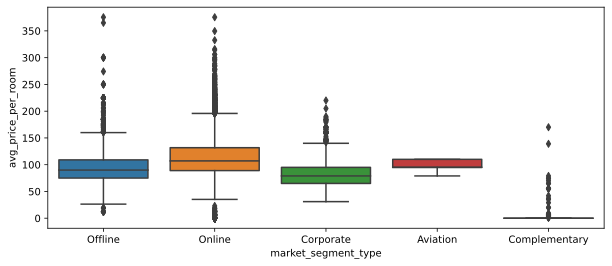

In [18]:
plt.figure(figsize = (10, 4))

sns.boxplot(data = data, x = "market_segment_type", y = "avg_price_per_room")

plt.show()

**Observations:**

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are very similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status.**

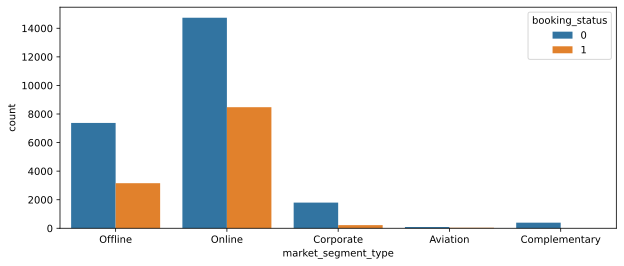

In [19]:
plt.figure(figsize = (10, 4))

sns.countplot(x = 'market_segment_type', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* Online bookings have the highest number of cancellations.
* Other types of bookings have much lower proportion of cancellations than the bookings made online. So they seem to be less prone to it.
* Corporate, Aviation and Complementary have very low proportion of cancellations compared to Online and Offline bookings. 

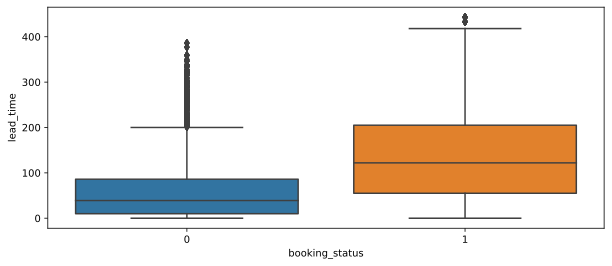

In [20]:
plt.figure(figsize = (10, 4))

sns.boxplot(data = data, x = "booking_status", y = "lead_time")

plt.show()

**Observations:**

* There's a substantial difference in the median value of lead time for bookings that were canceled and bookings that were not canceled. 
* The higher the lead time, the higher are the chances of a booking being canceled.

**Now, let's check how the arrival month impacts the booking status.**

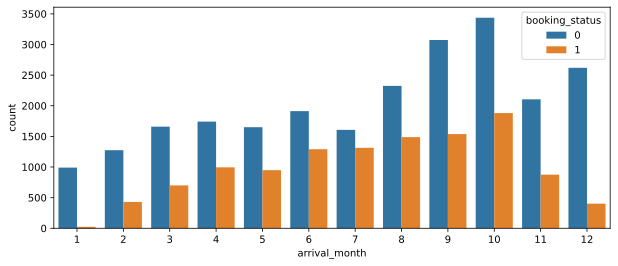

In [21]:
plt.figure(figsize = (10, 4))

sns.countplot(x = 'arrival_month', hue = 'booking_status', data = data)

plt.show()

**Observations:**

- The most prone months to cancellation are June and July.  
- Bookings made for December and January are least prone to cancellations.

**Let's check how the arrival date impacts the booking status.**

In [94]:
data['booking_status'].value_counts(normalize=True)[0]

0.6723638869745003

In [ ]:
date for date in data['arrival_date']

In [111]:
# Let's create order to plot arrival dates by number of cancellations.
# We will create a list of tuples where first value is the arrival date and the second value is quantity of cancelled bookings
# To sort it let's create a function

def sort_tuples(tuples): 
    return(sorted(tuples, reverse=True, key=lambda t: t[1]))  
cancellation_num = [(date,data[data['arrival_date']==date]['booking_status'].value_counts()[1]) for date in data['arrival_date'].unique()]
cancellation_num = sort_tuples(cancellation_num)
order = [tup[0] for tup in cancellation_num]

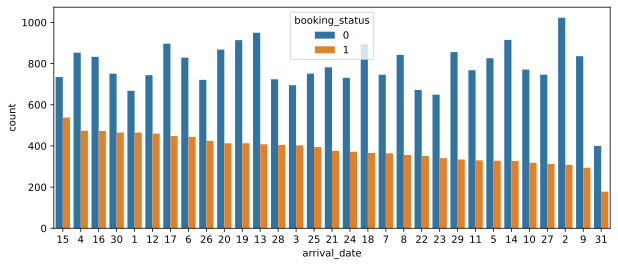

In [113]:
plt.figure(figsize=(10, 4))

sns.countplot(x='arrival_date',
              hue='booking_status',
              data=data,
             order=order)

plt.show()

**Observations:**

- The arrival dates on which the bookings are the most prone to cancellations are: 1, 4, 12, 15,16  and 30.   

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

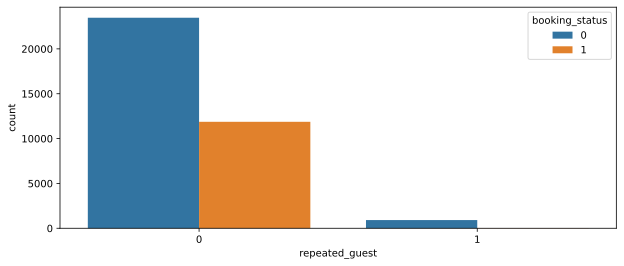

In [22]:
plt.figure(figsize = (10, 4))

sns.countplot(x = 'repeated_guest', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* There are very few repeat customers but the cancellation among them is non-existent. 
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

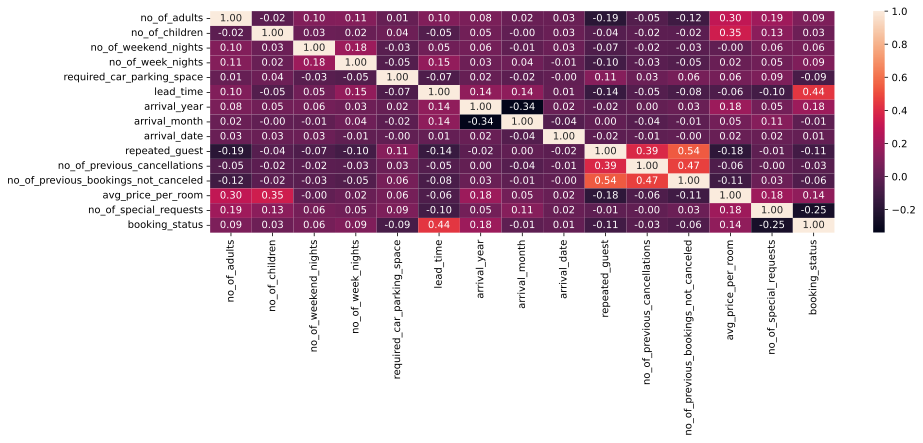

In [23]:
plt.figure(figsize=[14,4])
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

**Observations:**

* There is moderate positive correlation of 44% between booking status and lead time
* There is moderate positive correlation of 54% between the number of previous bookings not cancelled and repetead guest
* There is moderate positive correlation of 47% beetween the number previous bookings not cancelled and number of previous cancellation. Which might be explained by the fact that most of the customers never cancelled their bookings before. 
* All other correlations seem to be low or neglible. 


## **Preparing the data for modeling**

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

In [24]:
X = data.drop('booking_status',axis=1)
Y = data['booking_status']

In [25]:
X = pd.get_dummies(X, drop_first=True)

In [26]:
Y.unique()

array([0, 1])

In [27]:
# Let's chech how the target classes are distributed in the data before doing the train/test split
print((Y==0).sum()/len(Y))
print((Y==1).sum()/len(Y))

0.6723638869745003
0.32763611302549966


**Observations:**

- We see that the target classes are distributed unevenly in the data, so it would be benefitial to use a stratified train/test split. 

In [28]:
# Let's split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=1)

In [29]:
print('Train target classes split')
print((y_train==0).sum()/len(y_train),'|',(y_train==1).sum()/len(y_train))
print('-'*150)
print('Train target classes split')
print((y_test==0).sum()/len(y_test),'|',(y_test==1).sum()/len(y_test))

Train target classes split
0.6723771266540642 | 0.3276228733459357
------------------------------------------------------------------------------------------------------------------------------------------------------
Train target classes split
0.6723329964164293 | 0.3276670035835707


**Observations:**

- We see that the classes split is preserved in the y_train and y_test, so we can proceed with the modeling. 

## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer cancels their booking.
2. Predicting a customer will cancel their booking but in reality, the customer does not cancel their booking. 

**Which case is more important?** 
* Both the cases are equally important as:

* If we predict that a booking will not be canceled and the booking gets canceled, then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled, then the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


**How to reduce the losses?**

* The hotel group would want `F1 Score` to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [45]:
# Function to print classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted, digits=4))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])
    plt.ylabel('Actual') 
    plt.xlabel('Predicted') 
    plt.show()

## **Model Selection**

We are going to explore multiple types of models in order to find the best fit for the task at hand. 
So let's create the initial list of models to check and build up from there. 

In [61]:
# Let's instantiate the models
lr = LogisticRegression(random_state=1)
dTree = DecisionTreeClassifier(random_state=1)
KNN = KNeighborsClassifier()
LD = LinearDiscriminantAnalysis()
QD = QuadraticDiscriminantAnalysis()
bagging = BaggingClassifier(random_state=1)
bagging_dTree = BaggingClassifier(base_estimator=dTree,random_state=1)
bagging_KNN = BaggingClassifier(base_estimator=KNN,random_state=1)
xTree=ExtraTreesClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
GBoost = GradientBoostingClassifier(random_state=1)
naive_bayes = GaussianNB()
ada_dTree=AdaBoostClassifier(base_estimator=dTree, random_state=1)
ada_rf = AdaBoostClassifier(base_estimator=rf)
vote=VotingClassifier(estimators=[('dTree', dTree), 
                                  ('KNN', KNN), ('bagging',bagging),
                                  ('xTree',xTree), ('rf',rf),('GBoost',GBoost),
                                  ('naive_bayes',naive_bayes), ],voting='soft',n_jobs=-1)

In [62]:
models=[lr,dTree,KNN,LD,QD,bagging,bagging_dTree,bagging_KNN,xTree,rf,GBoost,
        naive_bayes,ada_dTree,ada_rf,vote]
model_names=['lr','dTree','KNN','LD','QD','bagging','bagging_dTree','bagging_KNN','xTree',
             'rf','GBoost','naive_bayes','ada_dTree','ada_rf','vote']

In [63]:
for i, model in enumerate(models):
    model.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print(model_names[i],':',"{:.4f}".format(accuracy_score(y_train,pred_train)),'|',"{:.4f}".format(accuracy_score(y_test,pred_test)))

lr : 0.7930 | 0.7899
dTree : 0.9944 | 0.8629
KNN : 0.8678 | 0.8012
LD : 0.7990 | 0.7966
QD : 0.3610 | 0.3607
bagging : 0.9868 | 0.8862
bagging_dTree : 0.9868 | 0.8862
bagging_KNN : 0.8729 | 0.8036
xTree : 0.9944 | 0.8916
rf : 0.9944 | 0.8996
GBoost : 0.8535 | 0.8511
naive_bayes : 0.4127 | 0.4101
ada_dTree : 0.9944 | 0.8674
ada_rf : 0.9944 | 0.8945
vote : 0.9941 | 0.8901


**Observations**:

- We see that the most of the models either overfitting or not giving good results. 
- The best result on the test set is achieved by the Random Forest but the model is overfitting quite a bit (0.9944 vs 0.8996)
- The only model which gives reasonably good results and doesn't overfit is the Bagging Classifier (0.8535 vs 0.8511)
- We will try to get the most of the Random Forest and also to explore what we can achieve with XGBoost model which is a very potent classifier. 
- Than we will explore what might be achieved with a Bagging Classifier. 


### **Random Forest Classifier**

In [64]:
from hpsklearn import random_forest_classifier
rf = HyperoptEstimator(classifier=random_forest_classifier('rf'), preprocessing=any_preprocessing('pre'), 
                            algo=tpe.suggest, max_evals=100, trial_timeout=300)
# perform the search
rf.fit(X_train.values, y_train.values)

100%|██████████| 100/100 [00:31<00:00, 31.66s/trial, best loss: 0.09962591061232529]


In [65]:
# summarize performance
train_acc = rf.score(X_train,y_train)
test_acc = rf.score(X_test, y_test)

print("Train Accuracy:", "{:.4f}".format(train_acc), '|',"Test Accuracy:", "{:.4f}".format(test_acc))
# summarize the best model
print(rf.best_model())

Train Accuracy: 0.9942 | Test Accuracy: 0.9013
{'learner': RandomForestClassifier(criterion='entropy', max_features=0.6250399629987244,
                       min_samples_split=3, n_estimators=980, n_jobs=1,
                       random_state=4, verbose=False), 'preprocs': (MinMaxScaler(feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}


**Observtions:**

- We see that we achieved slightly improved results, but the model is still overfitting. 

- Let's check the confusion matrix. 

In [54]:
# Let's fit the model
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(pd.concat([X_train,X_test],axis=0))
X_train_minmax_one_minus_one = MinMaxScaler.transform(X_train)
X_test_minmax_one_minus_one = MinMaxScaler.transform(X_test)
rf = RandomForestClassifier(criterion='entropy', 
                            max_features=0.6250399629987244,
                            min_samples_split=3,
                            n_estimators=980,
                            n_jobs=1,
                            random_state=4,
                            verbose=False)
rf.fit(X_train_minmax_one_minus_one,y_train)

RandomForestClassifier(criterion='entropy', max_features=0.6250399629987244,
                       min_samples_split=3, n_estimators=980, n_jobs=1,
                       random_state=4, verbose=False)

              precision    recall  f1-score   support

           0     0.9935    0.9979    0.9957     17073
           1     0.9956    0.9867    0.9911      8319

    accuracy                         0.9942     25392
   macro avg     0.9946    0.9923    0.9934     25392
weighted avg     0.9942    0.9942    0.9942     25392



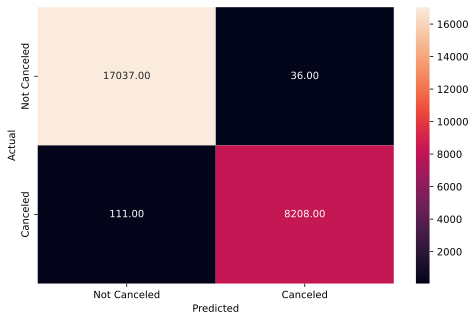

In [91]:
y_pred_train_rf=rf.predict(X_train_minmax_one_minus_one)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0     0.9108    0.9457    0.9279      7317
           1     0.8791    0.8099    0.8431      3566

    accuracy                         0.9012     10883
   macro avg     0.8950    0.8778    0.8855     10883
weighted avg     0.9004    0.9012    0.9001     10883



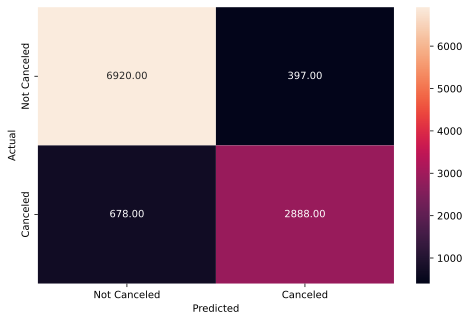

In [92]:
y_pred_test_rf=rf.predict(X_test_minmax)
metrics_score(y_test, y_pred_test_rf)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking.
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking.
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking.
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking.

**Observations:**

- We see a very solid balance between precision and recall in train set. 
- Unfortunately we see some disbalance between precision and recall in test set, especially for the target class 1.
- Also it's clear that the model is somewhat overfitting. 

### **XGBoost Classifier**

Let's try xgboost classsification. Which tends to be optimally regularized and not to overfit. 

In [94]:
xgboost = HyperoptEstimator(classifier=xgboost_classification('xgboost'), preprocessing=any_preprocessing('pre'), 
                            algo=tpe.suggest, max_evals=100, trial_timeout=300)
# let's perform the search
xgboost.fit(X_train.values, y_train.values)

100%|██████████| 100/100 [01:34<00:00, 94.78s/trial, best loss: 0.09765701909824764]


In [98]:
# summarize the best model
print(xgboost.best_model())

{'learner': XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.7260779093055354, colsample_bynode=None,
              colsample_bytree=0.5620924128733962, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.3665480173719713e-06, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.007590167174635378, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=4600, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...), 'preprocs': (StandardScaler(with_std=False),), 'ex_preprocs': ()}


In [65]:
# summarize performance
StandardScaler = preprocessing.StandardScaler(with_std=False).fit(pd.concat([X_train,X_test],axis=0))
X_train_zscored = StandardScaler.transform(X_train)
X_test_zscored = StandardScaler.transform(X_test)

In [112]:
xgb_classifier = xgboost['learner']

In [113]:
xgb_classifier.fit(X_train_zscored,y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.7260779093055354, colsample_bynode=None,
              colsample_bytree=0.5620924128733962, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.3665480173719713e-06, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.007590167174635378, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=4600, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0     0.9774    0.9894    0.9834     17073
           1     0.9777    0.9530    0.9652      8319

    accuracy                         0.9775     25392
   macro avg     0.9775    0.9712    0.9743     25392
weighted avg     0.9775    0.9775    0.9774     25392



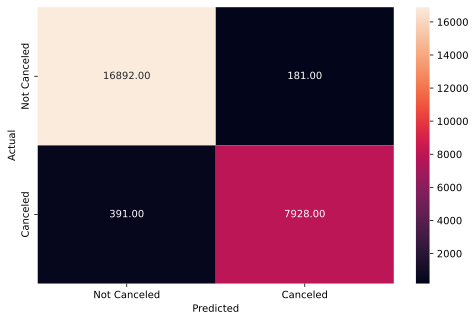

In [114]:
y_pred_train_xgb=xgb_classifier.predict(X_train_zscored)
metrics_score(y_train, y_pred_train_xgb)

              precision    recall  f1-score   support

           0     0.9065    0.9460    0.9258      7317
           1     0.8783    0.7998    0.8372      3566

    accuracy                         0.8981     10883
   macro avg     0.8924    0.8729    0.8815     10883
weighted avg     0.8973    0.8981    0.8968     10883



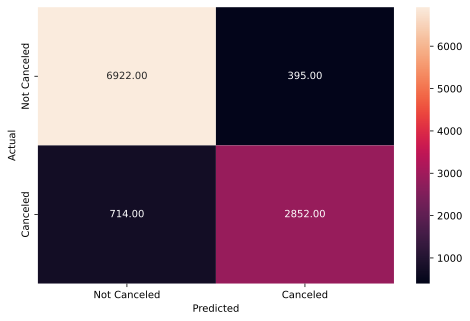

In [115]:
y_pred_test_xgb=xgb_classifier.predict(X_test_zscored)
metrics_score(y_test, y_pred_test_xgb)

**Observations:**

- XGBoost shows slightly worse results than the random forest model, but at the same time it shows less overfitting. 
- Unfortunately the disbalance between precision and recall in test set is higher than with the random forest model. 
- Let's try to further optimise the XGBoost model. 

In [75]:
xgb_params = xgb_classifier.get_params()
xgb_params

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': 0.7260779093055354,
 'colsample_bynode': None,
 'colsample_bytree': 0.5620924128733962,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 2.3665480173719713e-06,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.007590167174635378,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': 0,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 1,
 'monotone_constraints': None,
 'n_estimators': 4600,
 'n_jobs': 1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.03890063132440931,
 'reg_lambda': 1.0855237264452209,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 0.5675991186926117,
 'tree_method': None,
 'validate_para

In [74]:
xgbmodel=xgb.XGBClassifier(**xgb_params)

In [76]:
xgb_params = xgbmodel.get_xgb_params()
xgtrain = xgb.DMatrix(X_train_zscored, y_train)
cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round=xgbmodel.get_params()['n_estimators'], nfold=5,
metrics='error', early_stopping_rounds=50)
xgbmodel.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.7260779093055354, colsample_bynode=None,
              colsample_bytree=0.5620924128733962, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.3665480173719713e-06, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.007590167174635378, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=980, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [77]:
cvresult

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.316340,0.003619,0.323449,0.007891
1,0.217489,0.058470,0.227636,0.059124
2,0.193072,0.055729,0.204872,0.058182
3,0.163161,0.033740,0.177105,0.033091
4,0.161241,0.036885,0.174191,0.034229
...,...,...,...,...
975,0.084682,0.000798,0.111335,0.005987
976,0.084692,0.000789,0.111374,0.005939
977,0.084682,0.000772,0.111217,0.005961
978,0.084702,0.000756,0.111138,0.005962


In [78]:
# Let's add  train and validation accuracies to the history
cvresult['Train Accuracy']=1-cvresult['train-error-mean']
cvresult['Validation Accuracy']=1-cvresult['test-error-mean']
cvresult.drop(['train-error-mean','train-error-std','test-error-mean','test-error-std'],axis=1,inplace=True)
cvresult

,Train Accuracy,Validation Accuracy
0,0.683660,0.676551
1,0.782511,0.772364
2,0.806928,0.795128
3,0.836839,0.822895
4,0.838759,0.825809
...,...,...
975,0.915318,0.888665
976,0.915308,0.888626
977,0.915318,0.888783
978,0.915298,0.888862


In [79]:
xgbmodel.fit(X_train_zscored,y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.7260779093055354, colsample_bynode=None,
              colsample_bytree=0.5620924128733962, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.3665480173719713e-06, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.007590167174635378, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=980, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0     0.9202    0.9531    0.9364     17073
           1     0.8961    0.8304    0.8620      8319

    accuracy                         0.9129     25392
   macro avg     0.9082    0.8917    0.8992     25392
weighted avg     0.9123    0.9129    0.9120     25392



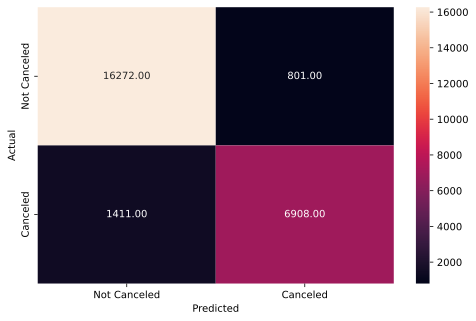

In [80]:
y_pred_train_xgb=xgbmodel.predict(X_train_zscored)
metrics_score(y_train, y_pred_train_xgb)

              precision    recall  f1-score   support

           0     0.8979    0.9434    0.9201      7317
           1     0.8704    0.7799    0.8227      3566

    accuracy                         0.8898     10883
   macro avg     0.8842    0.8616    0.8714     10883
weighted avg     0.8889    0.8898    0.8882     10883



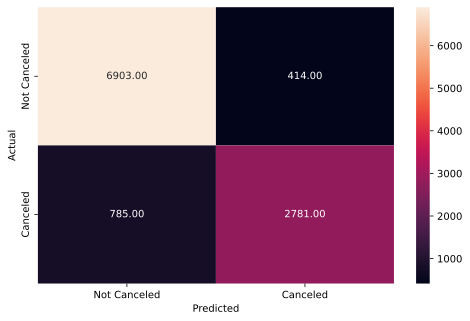

In [82]:
y_pred_test_xgb=xgbmodel.predict(X_test_zscored)
metrics_score(y_test, y_pred_test_xgb)

**Observations:**

- We see that the improved XGBoost model shows no overfitting. 
- Unfortunately the disbalance between precision and recall deteriorated for the test set. 
- The train and test accuracies slightly decreased. 

Let's make further explorations. 

### **Bagging Classifier**

Let's try Bagging Classifier classsification, which showed decent results and no signs of overfitting during the initial fit. 

In [130]:
from hpsklearn import bagging_classifier
bagging = HyperoptEstimator(classifier=bagging_classifier('bagging'), preprocessing=any_preprocessing('pre'), 
                            algo=tpe.suggest, max_evals=100, trial_timeout=300)
# perform the search
bagging.fit(X_train.values, y_train.values)

100%|██████████| 100/100 [00:02<00:00,  2.16s/trial, best loss: 0.10572947430596569]


In [140]:
print(bagging.best_model())

{'learner': BaggingClassifier(base_estimator=None, max_samples=0.9, n_jobs=1,
                  random_state=1, verbose=False), 'preprocs': (Normalizer(norm='max'),), 'ex_preprocs': ()}


In [40]:
bagging = BaggingClassifier(base_estimator=None, max_samples=0.9, n_jobs=1,
                  random_state=1, verbose=False)

In [41]:
norm_max_scaler = preprocessing.Normalizer(norm='max')
X_train_norm_max = norm_max_scaler.transform(X_train)
X_test_norm_max = norm_max_scaler.transform(X_test)

In [43]:
bagging.fit(X_train_norm_max, y_train)

BaggingClassifier(base_estimator=None, max_samples=0.9, n_jobs=1,
                  random_state=1, verbose=False)

              precision    recall  f1-score   support

           0     0.9828    0.9948    0.9887     17073
           1     0.9890    0.9642    0.9764      8319

    accuracy                         0.9848     25392
   macro avg     0.9859    0.9795    0.9826     25392
weighted avg     0.9848    0.9848    0.9847     25392



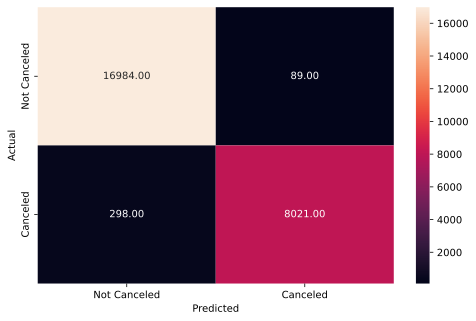

In [46]:
y_pred_train_bagging=bagging.predict(X_train_norm_max)
metrics_score(y_train, y_pred_train_bagging)

              precision    recall  f1-score   support

           0     0.8986    0.9385    0.9181      7317
           1     0.8612    0.7827    0.8200      3566

    accuracy                         0.8874     10883
   macro avg     0.8799    0.8606    0.8691     10883
weighted avg     0.8863    0.8874    0.8860     10883



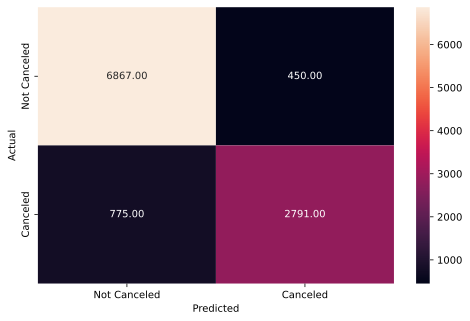

In [48]:
y_pred_test_bagging=bagging.predict(X_test_norm_max)
metrics_score(y_test, y_pred_test_bagging)

**Observations:**

- The bagging model shows overfitting, rather high disbalance between precision and recall in test set and lower test accuracy than the previous models. 

Let's continue exploration. 

### **LightGBM Classifier**

Let's try LightGBM Classifier, which might be promising algorithm. 

In [31]:
from hpsklearn import lightgbm_classification
lightgbm_model = HyperoptEstimator(classifier=lightgbm_classification('lgbm'), preprocessing=any_preprocessing('pre'), 
                            algo=tpe.suggest, max_evals=100, trial_timeout=300)
# perform the search
lightgbm_model.fit(X_train.values, y_train.values)

100%|██████████| 100/100 [00:04<00:00,  4.77s/trial, best loss: 0.10316991533766484]


In [32]:
print(lightgbm_model.best_model())

{'learner': LGBMClassifier(colsample_bytree=0.7905462189741754,
               learning_rate=0.007578774680436212, max_delta_step=0,
               max_depth=7, min_child_weight=1, n_estimators=6000, n_jobs=1,
               num_leaves=35, objective='binary', reg_alpha=0.3466706016188538,
               reg_lambda=1.3354013148223929, scale_pos_weight=1, seed=4,
               subsample=0.9967393269469969), 'preprocs': (Normalizer(norm='max'),), 'ex_preprocs': ()}


In [37]:
# summarize performance
train_acc = lightgbm_model.score(X_train,y_train)
test_acc = lightgbm_model.score(X_test, y_test)

print("Train Accuracy:", "{:.4f}".format(train_acc), '|',"Test Accuracy:", "{:.4f}".format(test_acc))

Train Accuracy: 0.9331 | Test Accuracy: 0.8930


In [51]:
lightgbm_model = lightgbm_model.best_model()['learner']

In [49]:
norm_max_scaler = preprocessing.Normalizer(norm='max')
X_train_norm_max = norm_max_scaler.transform(X_train)
X_test_norm_max = norm_max_scaler.transform(X_test)

              precision    recall  f1-score   support

           0     0.9391    0.9630    0.9509     17073
           1     0.9198    0.8719    0.8952      8319

    accuracy                         0.9331     25392
   macro avg     0.9295    0.9174    0.9231     25392
weighted avg     0.9328    0.9331    0.9327     25392



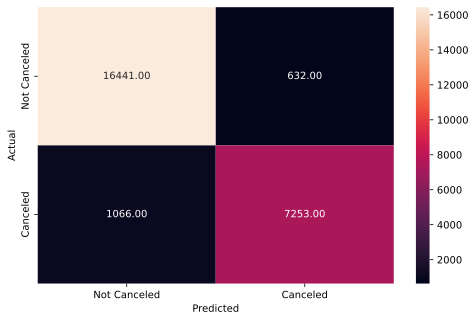

In [52]:
y_pred_train_lgbm=lightgbm_model.predict(X_train_norm_max)
metrics_score(y_train, y_pred_train_lgbm)

              precision    recall  f1-score   support

           0     0.9027    0.9425    0.9222      7317
           1     0.8702    0.7916    0.8291      3566

    accuracy                         0.8930     10883
   macro avg     0.8865    0.8671    0.8756     10883
weighted avg     0.8921    0.8930    0.8917     10883



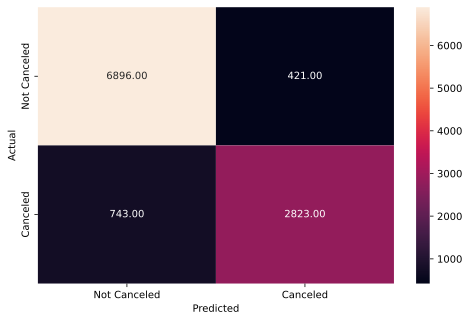

In [53]:
y_pred_test_lgbm=lightgbm_model.predict(X_test_norm_max)
metrics_score(y_test, y_pred_test_lgbm)

**Observations:**

- We see that the lgbm model show almost no signs of overfitting. 
- The accuracy on the test set is third highest and is very close to the best result achieved by the first two (Random Forest and XGB). 
- There is still some disbalance between precision and recall in the test set, which is better than for XGB, but slightly worse than for the random forest model. 

We choose to go with the `LGBM model`. 

## **Factor Importance Analysis**

One of the major tasks at hand is to analyse factor importances to help INN Hotels Group in formulating profitable policies for cancellations and refunds.

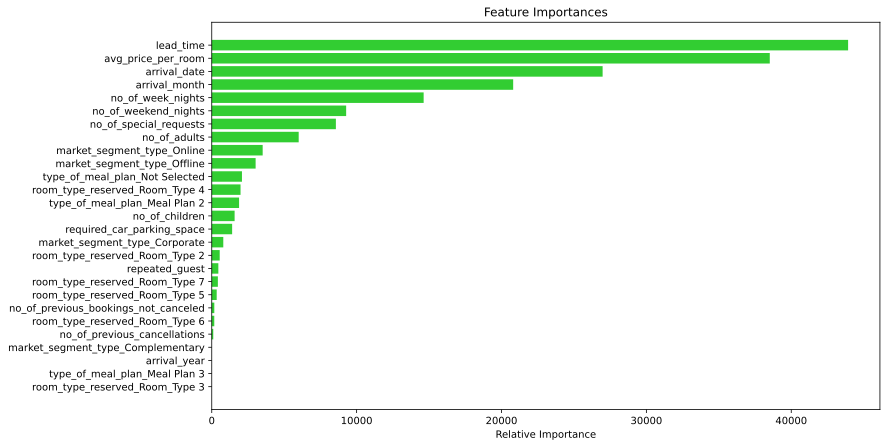

In [61]:
importances = lightgbm_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize = (12, 7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'limegreen', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance'
plt.show()

In [88]:
(data['repeated_guest']==1).sum()/len(data)

0.02563749138525155

### **Conclusion:**

- We have build the model to predict booking cancellations. The model shows very high testing accuracy of 89.3% and solid generalization potential. 
- As the result of factor importances  - the most important factors for booking cancellation are lead time, average price_per_room, arrival_date, arival_month and no_of_week_nights. 

### **Recommendations:**

1. The most important factor is lead time and we observed that the higher lead time is the more chances are that this booking will be cancelled. So the recommendation is: 
    * Contact people with long lead times in advance prior to the check-in data to check if the booking is still valid and not to be cancelled. It will help the hotel to win time and resell the room for a good price. 


2. Consider to introduce stricter refund policies.  
    * The booking where expenses and losses if it is cancelled higher should have stricter refund policies and less part is to be refunded. 
    * As we observed that online bookings are much more prone to cancellations may be it's worth testing stricter refund policy for this channel.
    * The Hotel Group might relax this policy towards Corporate, Aviation and Complementary segments. 


3. Customer Relationships Management. We saw that the INN Hotels Group has around 2.5% of the repeated guests. We believe that there might be  a room for improvement. 

    * The interactions that take place after a booking can demonstrate the level of attentiveness and care that guests can expect to receive at the hotel. To create a personalized experience, guests can be provided with information about local events, nearby attractions to visit, and other relevant details on an ongoing basis.
    * Test new incentive programms to attract repeated guest to visit more hotels of the INN Hotels Group and recommend visiting to their friends and acquaitances.
    
4. Develop a MEMO to what dates and months staff responsible for bookings should pay special attention to. For example we observed that June and July are the months which are the most prone to cancellations and the dates which are the most prone to cancellations are 1, 4, 12, 15,16  and 30. So it would be beneficial to elaborate on a MEMO with date periods in each month to pay special focus to.   